 # Uber Supply-Demand Gap Assignment

In [166]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [167]:
# Importing the numpy and pandas and other required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [200]:
# importing the Uber data csv file to a dataframe

uber = pd.read_csv("Uber Request Data.csv")
uber.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [201]:
# knowing about the dataframe to deal with data quality issues

uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [202]:
# Replacing the / with - in Request and drop timestamps to convert all the dates into one format

uber['Request timestamp']=uber['Request timestamp'].astype(str).str.replace('/','-')
uber['Drop timestamp']=uber['Drop timestamp'].astype(str).str.replace('/','-')

In [203]:
# Now converting the Object type Request and drop timestamp columns to datetime64[ns] type

# dayfirst= True will parses dates with the day first

uber['Request timestamp']=pd.to_datetime(uber['Request timestamp'],dayfirst=True)  
uber['Drop timestamp']=pd.to_datetime(uber['Drop timestamp'],dayfirst=True)

In [205]:
# now the request and drop timestamp is in datetime format
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [206]:
# Extracting hour from request timestamp 

uber['Request_hour']=uber['Request timestamp'].dt.hour

## Identifying most pressing problems


### 1. Plot showing frequency of requests that get cancelled or show 'no cars available'

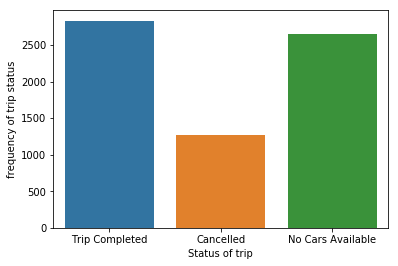

In [176]:
# plot shows frequency of requests for all the trip status.

ax=sns.countplot(uber['Status']) 
ax.set(xlabel='Status of trip',ylabel='frequency of trip status')
plt.show()

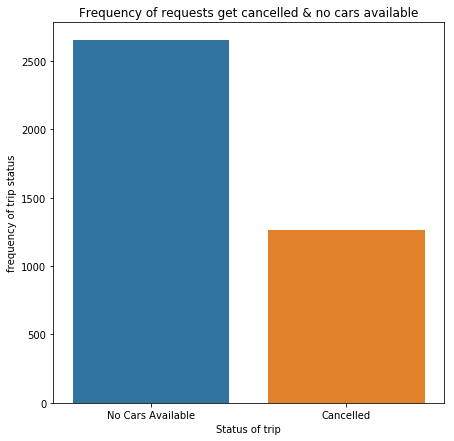

In [177]:
# Below plot clearly gives only frequency of requests getting cancelled & no cars available

# Chosen the countplot as it will give the count of categorical variable

plt.figure(figsize=(7,7))
ax=sns.countplot(uber['Status'],order=uber.Status.value_counts().iloc[1:3].index) 
ax.set(xlabel='Status of trip',ylabel='frequency of trip status')
plt.title("Frequency of requests get cancelled & no cars available")
plt.show()

So from above plots we can identify that one of the most pressing problem of UBER is trips getting "Cancelled" and "No cars available"

### Same result which shows frequency of each trip status in Bar plot

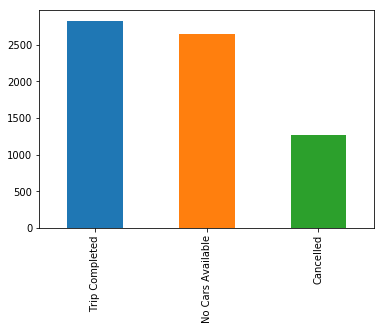

In [178]:
uber['Status'].value_counts().plot(kind='bar')
plt.show()


### 2. Identifying problematic types of requests 

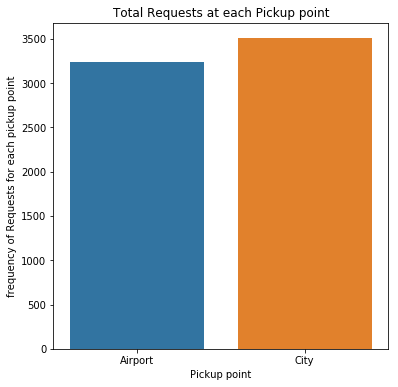

In [179]:
# Plot explains about more number of requests at which pickup point or which type of request

plt.figure(figsize=(6,6))
ax=sns.countplot(uber['Pickup point'])
ax.set(xlabel='Pickup point',ylabel='frequency of Requests for each pickup point')
plt.title("Total Requests at each Pickup point")
plt.show()

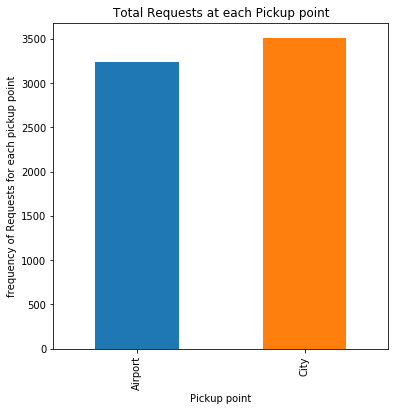

In [180]:
# another way of plotting to get number of requests at each pickup point.

fig,ax=plt.subplots(figsize=(6,6))
ax=uber.groupby('Pickup point').count()['Request id'].plot(ax=ax,kind='bar')
ax.set(xlabel='Pickup point',ylabel='frequency of Requests for each pickup point')
plt.title("Total Requests at each Pickup point")
plt.show()

By above 2 plots, we can identify we have more Requests from city to airport compared to airport to city.

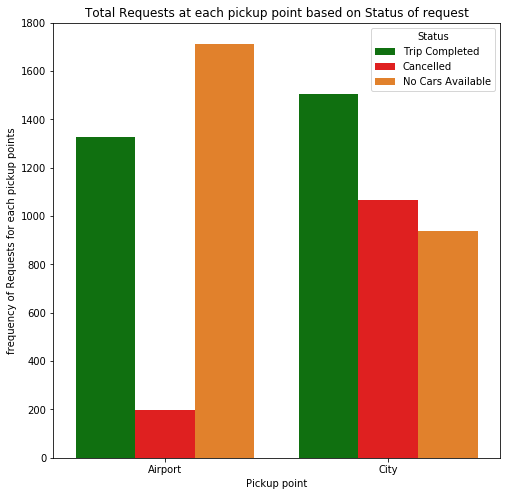

In [181]:
# Now identifying the most problematic type of requests by using any of the above 2 plots.

plt.figure(figsize=(8,8))
ax=sns.countplot(uber['Pickup point'],hue=uber['Status'], palette=['G','R','C1'])
ax.set(xlabel='Pickup point',ylabel='frequency of Requests for each pickup points')
plt.title("Total Requests at each pickup point based on Status of request")
plt.show()

Before we came to know that cancellations and no cars available is one of the problem. Now, with above plot we can see that if pickup point is "Airport" there are more requests which shows "No cars available", if the pickup point is "City" there are more requests which are "cancelled" than "No cars available" but count is nearly equal to "Cancelled" status.

So,Both type of requests are problematic but in different conditions.Most problematic requests is from Airport to City as there are more requests with "NO cars available" and also from City to Airport as there are more "Cancellations" than "No Cars" in city 

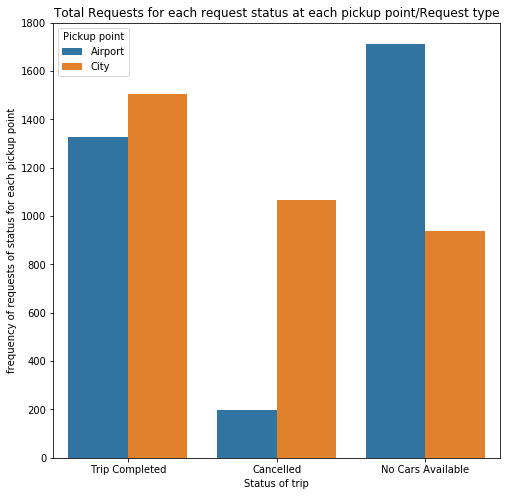

In [182]:
plt.figure(figsize=(8,8))
ax=sns.countplot(uber['Status'],hue=uber['Pickup point'])
ax.set(xlabel='Status of trip',ylabel='frequency of requests of status for each pickup point')
plt.title("Total Requests for each request status at each pickup point/Request type")
plt.show()

so, now this plot clearly satisfies the above point that problematic request is 
1. City to Airport as "Cancellations" are more
2. Airport to City as "No cars available" are more

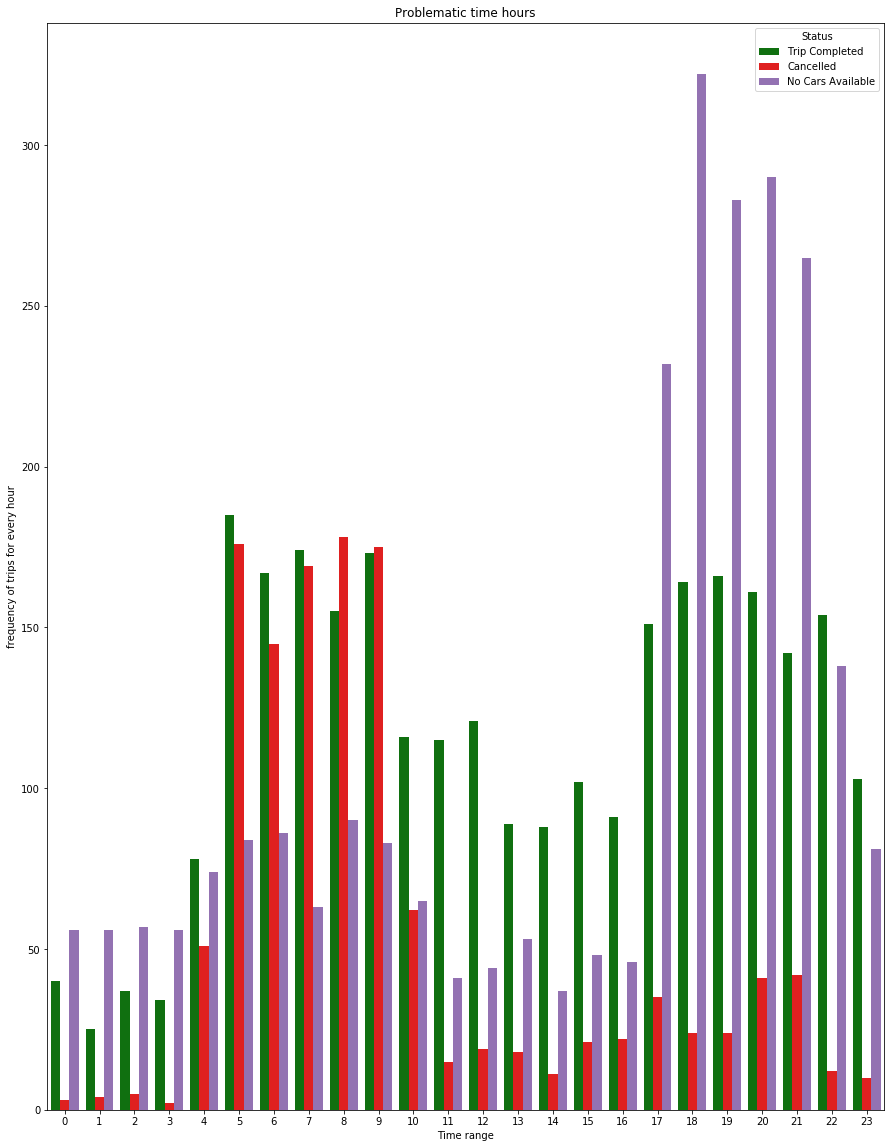

In [183]:
# Below plot shows in which hour the there are more trip requests and the status of trips which is a problem for uber.

# Chosen the countplot as it will give the count of categorical variable. in this case per hour count of requests.

plt.figure(figsize=(15,20))
ax=sns.countplot(uber['Request_hour'],hue=uber['Status'], palette=['G','R','C4'])
ax.set(xlabel='Time range',ylabel='frequency of trips for every hour')
plt.title("Problematic time hours")
plt.show()

The Above plot clearly tells that in time range 4AM to nearly 11AM there are more trip requests and from 5PM to 11PM there are more trip requests and in 12AM-3AM & 12PM-4PM there are trip requests but less compared to other timings. so we can say that these timings are the pressing hours for Uber.

In [207]:
# Gives day of week of requested date from column Request timestamp
uber['day_of_week'] = uber['Request timestamp'].dt.day_name()

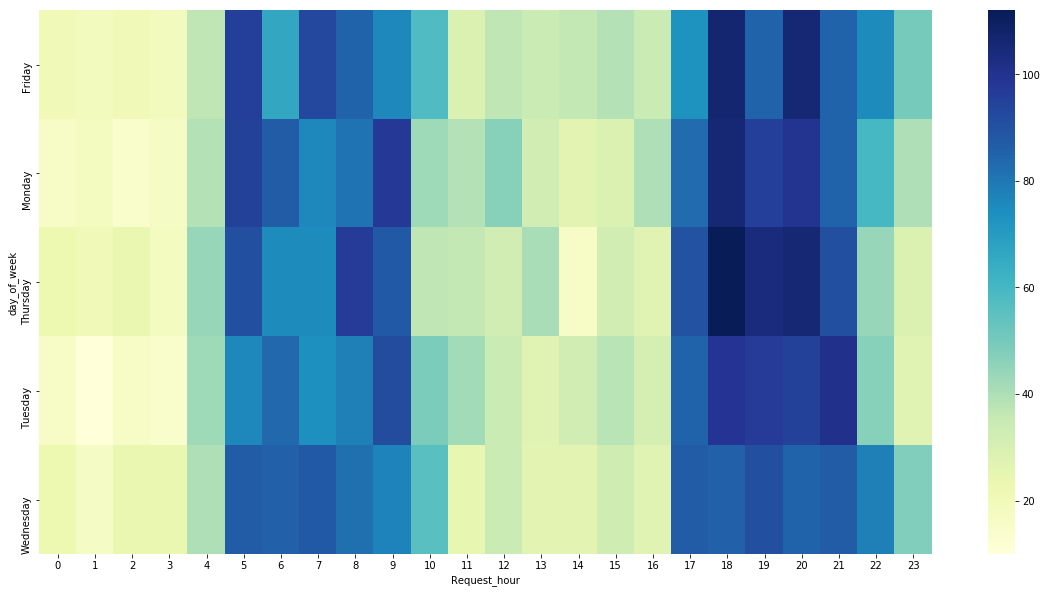

In [185]:
# heatmap which also satisfies the above point that problematic time hours and also tells in each weekday(shows hidden trends).

plt.figure(figsize=(20,10))
pv=pd.pivot_table(uber,values='Request id',columns='Request_hour',index='day_of_week',aggfunc='count')
sns.heatmap(pv,cmap='YlGnBu')
plt.show()

So this heatmap also tells that most requests happen in 5AM to 10-11AM and 5PM to 10-11PM and this trend continues in almost everyday of week(considering only weekdays).The reqeusts are more on friday compared to other days as most of people will be travelling on fridays for weekend holidays. Also, requests are more also on monday as most of people will be returning back on mondays. so by using heatmap, we are able to see the trend.

### Defining the Time slots

In [208]:
def time_slot(uber):
    if ((uber['Request_hour']>=0)&(uber['Request_hour']<=4)):
        timeslot='mid night'
    elif((uber['Request_hour']>=5)&(uber['Request_hour']<=7)):
        timeslot='early morning'
    elif((uber['Request_hour']>=8)&(uber['Request_hour']<=11)):
        timeslot='morning rush hours'
    elif((uber['Request_hour']>=12)&(uber['Request_hour']<=16)):
        timeslot='afternoon'
    elif((uber['Request_hour']>=17)&(uber['Request_hour']<=19)):
        timeslot='evening'
    elif((uber['Request_hour']>=20)&(uber['Request_hour']<=23)):
        timeslot='late evening/night'
    else:
        timeslot='not correct timezone'
    return timeslot

uber['Time_slot']=uber.apply(time_slot,axis=1)

In [209]:
uber.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_hour,day_of_week,Time_slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Monday,morning rush hours
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Monday,evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Tuesday,morning rush hours
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Tuesday,late evening/night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Wednesday,morning rush hours


### The Below plot now explains the most problematic types of requests (city to airport / airport to city etc.) and the time slots (early mornings, late evenings etc.) in a single plot.

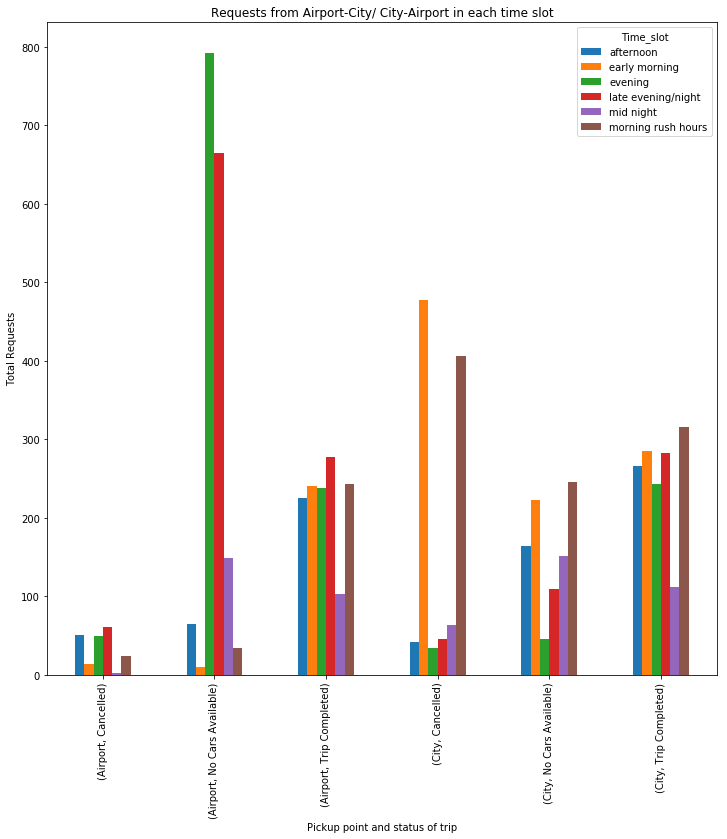

In [198]:
# chose the bar plot as it is useful to group the categorical variables

fig, ax = plt.subplots(figsize=(12,12))
ax=uber.groupby(['Pickup point','Status','Time_slot']).count()['Request id'].unstack().plot(ax=ax,kind='bar')
ax.set(xlabel="Pickup point and status of trip", ylabel="Total Requests")
plt.title("Requests from Airport-City/ City-Airport in each time slot")
plt.show()

By the above plot, we can identify that in time slots early morning and morning(rush hours), as "Cancellations" are more compared to No Cars Available and trip completions in city then the problematic request is from "City to Airport". In time slots evening and late evenings, as "No Cars available" are more compared to other trip status i.e.Cancellations and trip completions in Airport then the problematic request is from "Airport to City".



Clearly below plot shows and satisifies the above point that more cancellations are happening in morning rush hours and early mornings, "No cabs available" status is more in evenings and late evenings/night

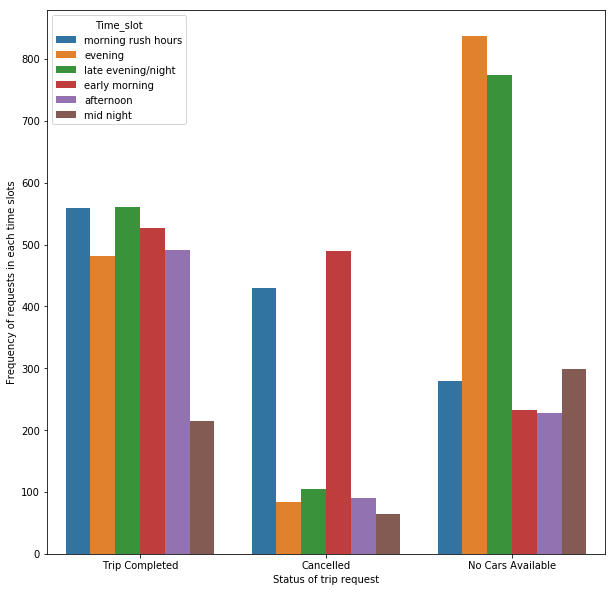

In [189]:

plt.figure(figsize=(10,10))
sns.countplot(uber['Status'],hue=uber['Time_slot'],palette=["C0", "C1", "C2",'C3','C4','C5'])
plt.xlabel("Status of trip request")
plt.ylabel("Frequency of requests in each time slots")
plt.show()

### 2.Finding out the gap between supply and demand and showing the same using plots.

In [210]:
# creating new columns supply and demand.

# Supply means the only requests that are successfully completed i.e. trip completed
uber['supply']=(uber['Status']=='Trip Completed').astype(int)

# demand means all the requests that customer made to uber i.e. status will be Cancelled|No cars|Trip completed
uber['demand']=((uber['Status']=='Cancelled')|(uber['Status']=='No Cars Available')
                |(uber['Status']=='Trip Completed')).astype(int)

In [212]:
# Below code will create new column supply/demand which tells that request is supplied to customer or not.

# Supply-demand is the gap.

uber['supply/demand']=np.where((uber['supply']==1) &(uber['demand']==1),'supply','demand')

### Time slots when the highest gap exists

Gap means difference that exists between the supply and demand. so lack of supply or gap are the requests with status "Cancelled" or "No cars available"

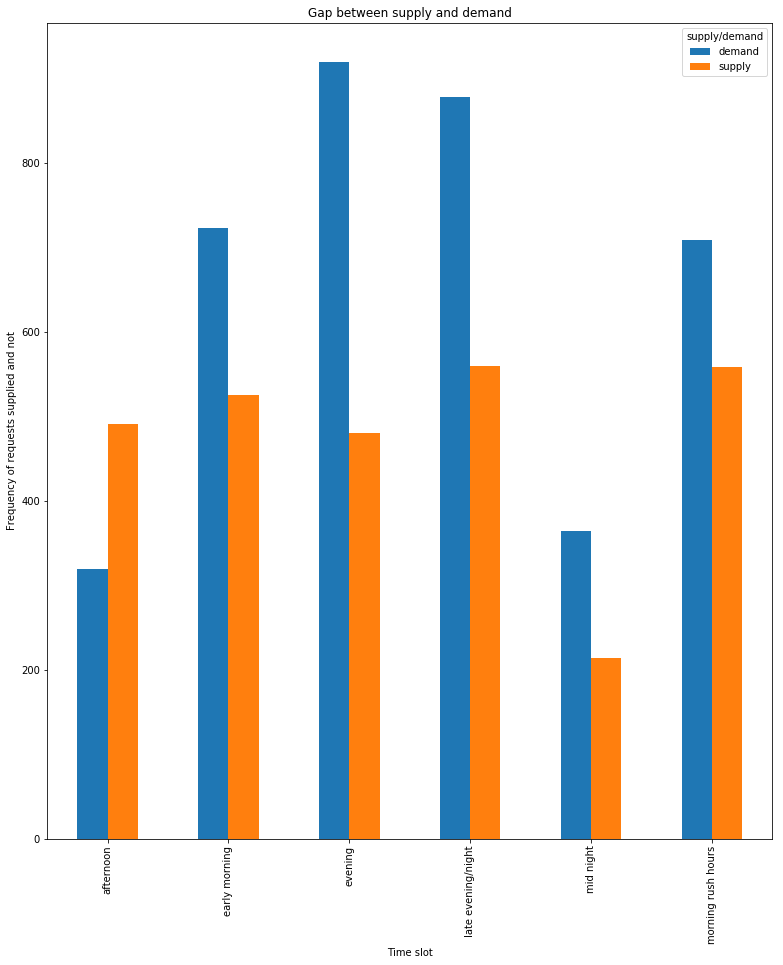

In [193]:
#  shows the time slots when the highest gap exists

# plot data
fig, ax = plt.subplots(figsize=(13,15))
# use unstack()

ax=uber.groupby(['Time_slot','supply/demand']).count()['Request id'].unstack().plot(ax=ax,kind='bar')
ax=ax.set(xlabel="Time slot",ylabel="Frequency of requests supplied and not")
plt.title("Gap between supply and demand")
plt.show()

The above plot shows the gap between supply and demand in which time slots. we can observe in morning,earlymorning, late evening,evenings there is highest gap exists. Gap exists in afternoon also but the supply is more than demand so no issues in afternoon slot, in midnight slot we can observe there is gap between demand and supply but not much severe compared to other time slots.

### Type of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots identified above

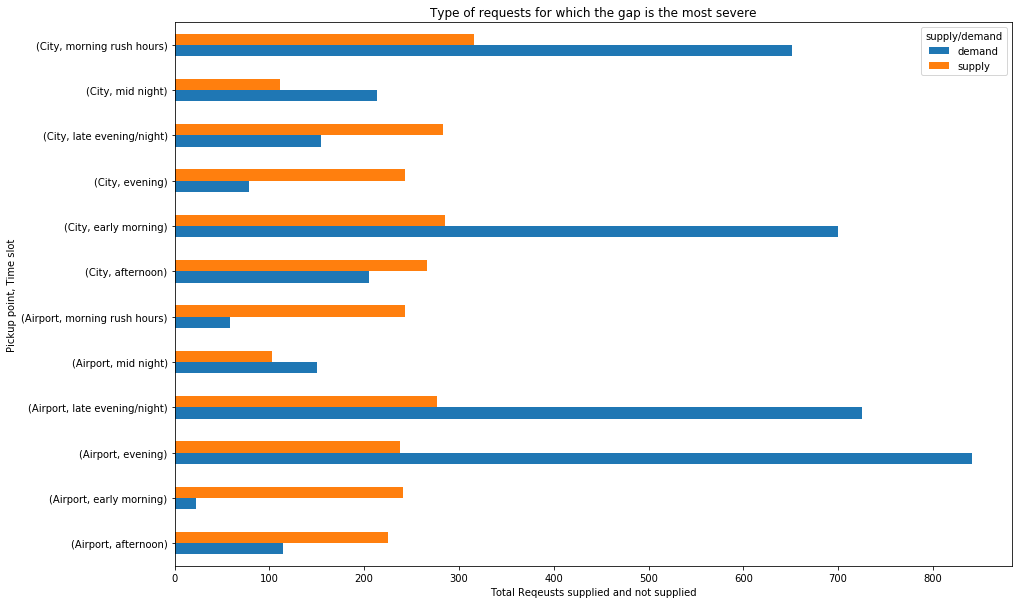

In [194]:
# plot data
fig, ax = plt.subplots(figsize=(15,10))

ax=uber.groupby(['Pickup point','Time_slot','supply/demand']).count()['Request id'].unstack().plot(ax=ax,kind='barh')

ax.set(xlabel="Total Reqeusts supplied and not supplied",ylabel="Pickup point, Time slot")
plt.title("Type of requests for which the gap is the most severe")
plt.show()

We identified the time slots where severe/highest gap between demand and supply from previous plot.Now the above plot explains that type of reqeusts in those time slots where severe gap exists. we can see that severe gap is in morning rush hours and in early morning where Requests are from "City to Airport", severe gap is also in evenings and late evening or night where Requests are from "Airport to City". In both reqeusts,in afteroon time slot, we can see supply more than demand so its not a problem. In midnight time slot the demand is more than supply but gap is not much severe.

From the plots, we can infer that most pressing problems of uber is 

1. Requests getting Cancelled and No cars available status
2. Problematic route i.e. type of requests-> Airport to City and City to Airport
3. Time slots/ hours when most(high)number of reqeusts are happening is Early Morning, Morning, Evening,late              evening/night. Afternoon and midnight also , there were quite decent number of requests.

Finding Demand and supply gap to analyse more:

1. I considered demand means all the requests which includes trip completed, cancelled and No cars available requests.
   Supply means all the requests which are only trip completed.
   
2. we found from plots that supply-demand gap is high in requests made from "City to Airport" during Early Morning,        Morning time slots and gap is also high in requests made from "Airport to City" during Evening,late evening/night      time slots.


## Few more plots helps to analyse more

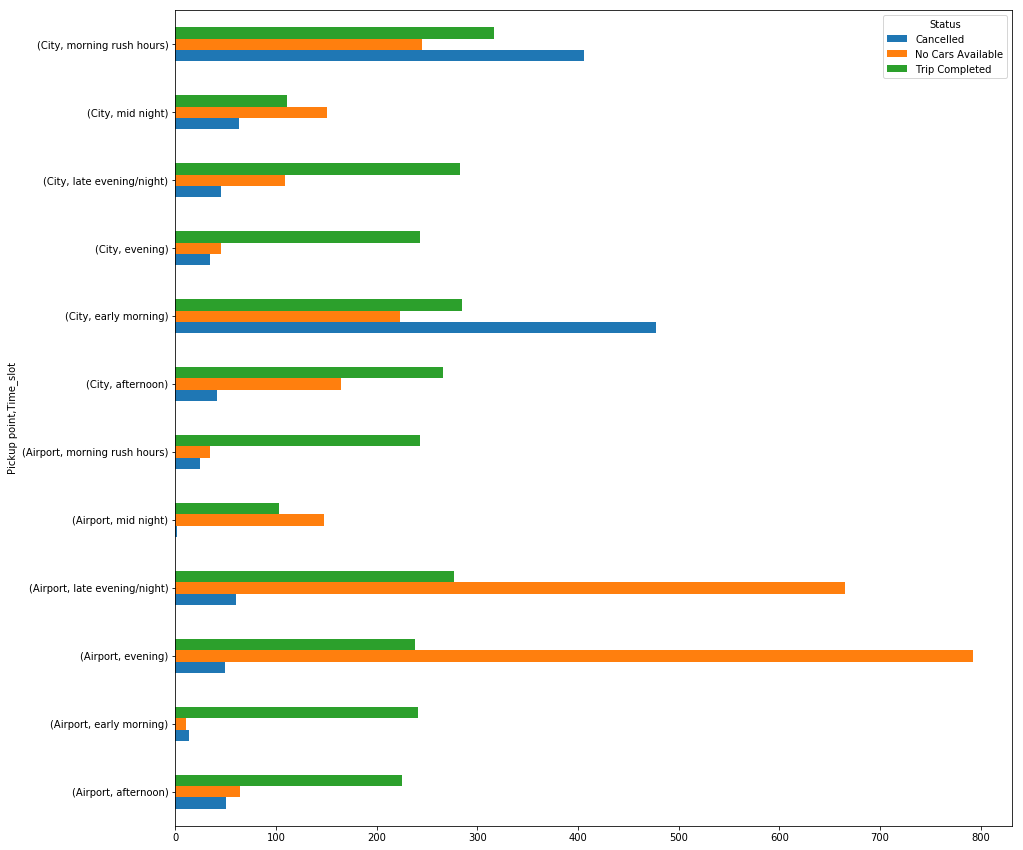

In [195]:
fig, ax = plt.subplots(figsize=(15,15))

ax=uber.groupby(['Pickup point','Time_slot','Status']).count()['Request id'].unstack().plot(ax=ax,kind='barh')
plt.show()

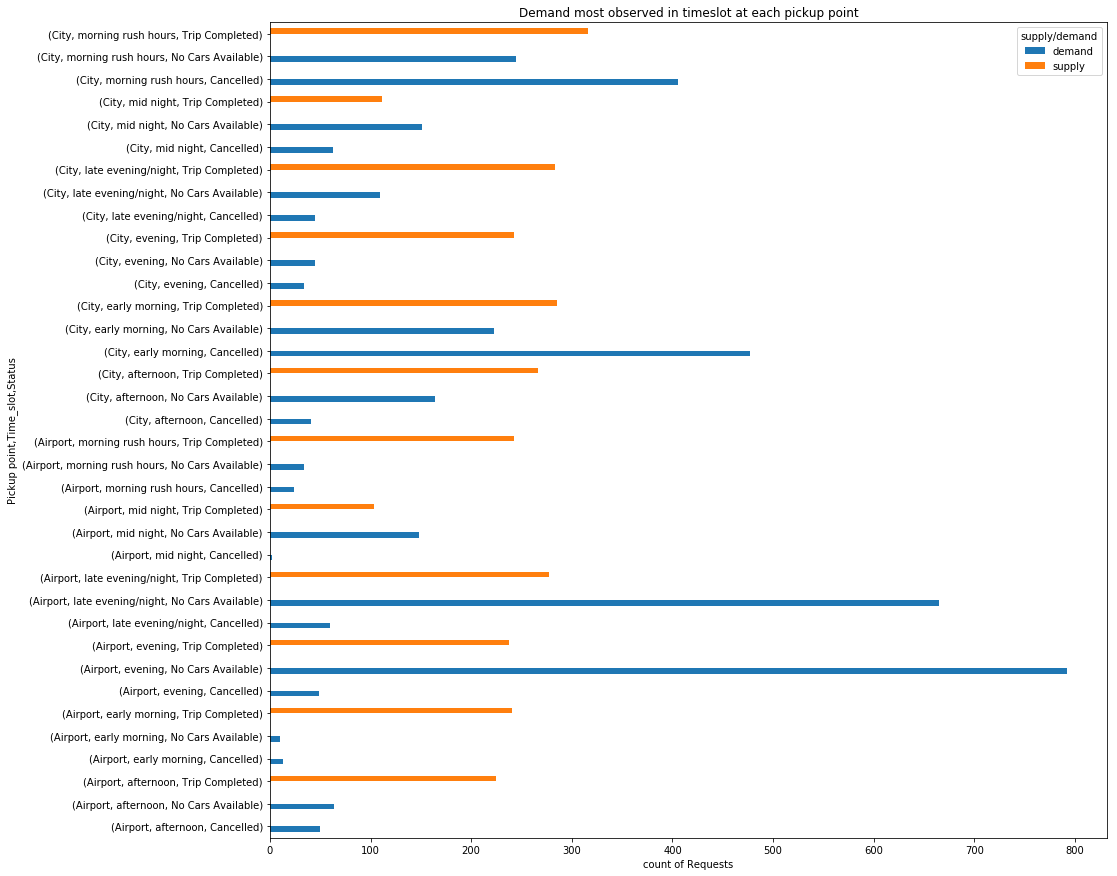

In [196]:
fig, ax = plt.subplots(figsize=(15,15))

ax=uber.groupby(['Pickup point','Time_slot','Status','supply/demand']).count()['Request id'].unstack().plot(ax=ax,kind='barh')
ax.set(xlabel='count of Requests')
plt.title('Demand most observed in timeslot at each pickup point')
plt.show()

From the above plots we can clearly see and infer which demand is most observed in which time slot and can see whether that reqeusts is supplied or not.

For example, If the pickup point is city, then in morning rush hours and mornings there are more requests which are getting cancelled. If the pickup point is Airport, then in early evenings and evenings there are more requests which shows "NO cars available".

so, by above plots, we can easily say which demand is most observed in which timeslot at which pickup point.

Below plot gives the average duration for each request type(pickup point)

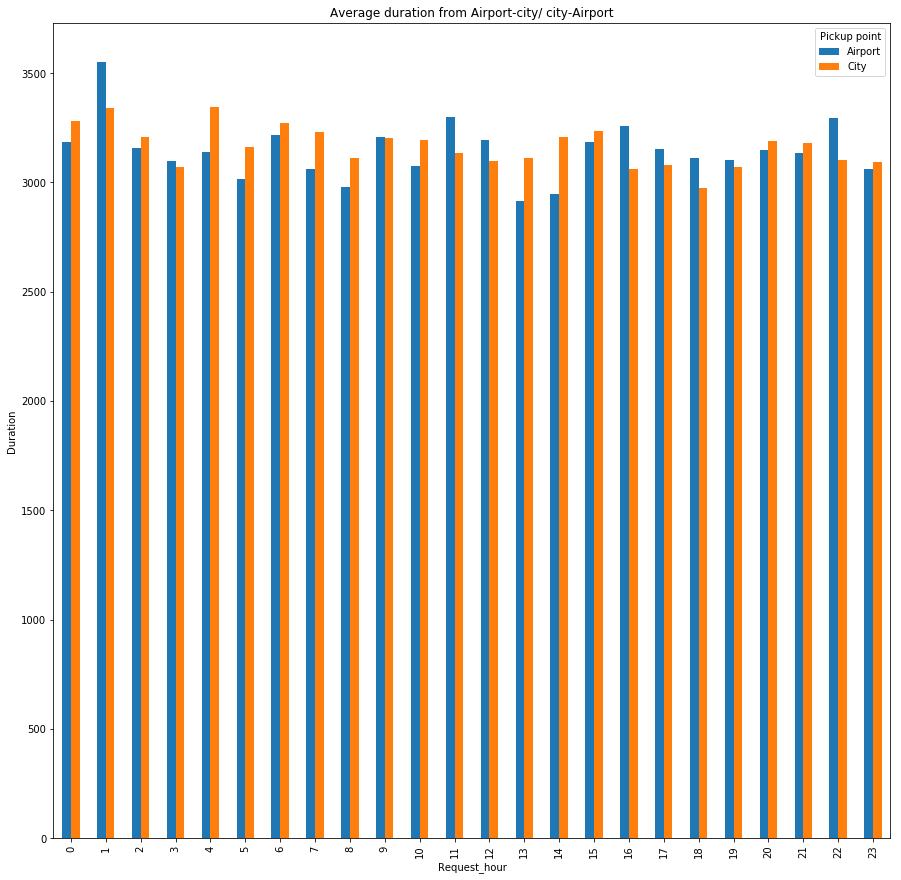

In [197]:
# creating new columns drop_hour and duration(droptime-requesttime in seconds)
uber['drop_hour']=(uber['Drop timestamp'].dt.hour)
uber['duration']=((uber['Drop timestamp']-uber['Request timestamp'])/np.timedelta64(1, 's'))

fig, ax = plt.subplots(figsize=(15,15))
ax=uber.groupby(['Request_hour','Pickup point']).mean()['duration'].unstack().plot(ax=ax,kind='bar')
ax.set(ylabel='Duration')
plt.title('Average duration from Airport-city/ city-Airport')
plt.show()

In [213]:
uber.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_hour,day_of_week,Time_slot,supply,demand,supply/demand
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Monday,morning rush hours,1,1,supply
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Monday,evening,1,1,supply
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Tuesday,morning rush hours,1,1,supply
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Tuesday,late evening/night,1,1,supply
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Wednesday,morning rush hours,1,1,supply


### Reason for this issue for the supply-demand gap

I think the reason for the this supply-demand gap is mainly because lets say a driver drops a customer in Airport after that he is getting trip requests after long time means the idle time of driver is maybe high at airport due to lack of flights coming to airport during that time and also he cant go back to city without any customer.

But sometimes driver has to go back to city empty as he cant wait at airport so long because driver may think he will lose other trips in city.
So,during those time slots like mornings and early mornings when driver gets a request to airport,driver is not taking rides to airport thinking about the duration to go to Airport and also drivers expect more rides in city radius only in those timeslots,also as the most of the flights like international flights will not be in those timings.


As we observe that supply-demand gap is more in evenings and late evenings/night also due to no cars available. As drivers are not accepting the more requests to airport. Even some accept requests to go to airport from city, as said before their idle time is high at airport and leaving without customers. so the customers receiving "No cars available" during that time slots.

To resolve this supply-demand gap, I think Uber can

1. Allot few drivers specifically for airport services and provide some extra incentives or other who opt for airport services. Few drivers have to be selected based on his/her rating and extra feedback given by customer(if any).                             

2. Collaborating with some flight companies or any other companies that gives flights estimated departure/arrival timings and based on that can assign separate cabs at airport or any other places so that they can increase cabs availability at those places during those times.
    Ex: Few applications are able to track the trains and alert the user before his station comes. They get the data about each from authorized one which is IRCTC. In same way, uber can also make partnership with airport authorities or the companies and can just know the flight departure/arrival timings(no need of tracking flight) and arrange more cabs during those times.          

3. Uber can add a feature like pre-booking for airport customers. Like if customer is sure of travelling by flight he can use this pre-booking feature by entering flight arrival/departure time and according to that uber can make sure there is availability of cabs at airport or to airport.

4. Uber can also reduce cancellations by driver/customer by taking few steps like:
   
    Uber can start customer care centre and know the exact reason for cancellations and check if its valid reason has               been put up in app or not. Based on that, they can charge money.
    
    If more cancellations are by driver then Uber customer care can intimate the driver that cancellations are                     increasing by him and can tell him that Uber will charge money and reduce trip requests  if the limit of                       cancellations reaches and reason for cancellation is not valid.
